### Connect to google colab and set working directory

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

%cd "/content/drive/MyDrive/Colab Notebooks/pneumonia-analysis"

Mounted at /content/drive/
/content/drive/MyDrive/Colab Notebooks/pneumonia-analysis


### Dataset path

In [ ]:
data_dir = '/content/drive/MyDrive/Colab Notebooks/pneumonia-analysis/dataset/chest_xray'

### Train model

In [ ]:
!python -m src.train --data_dir "$data_dir" --out_dir "/content/drive/MyDrive/pneumonia_runs/resnet18" --epochs 10 --arch resnet18 --loss focal --focal-gamma 2.0 --alpha-mode inv_freq --balance sampler --patience 3

Class counts: [1114, 2951]
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100% 44.7M/44.7M [00:00<00:00, 256MB/s]
Imbalance summary: {'strategy': 'sampler', 'loss': 'focal', 'class_counts': [1114, 2951], 'class_weights': None, 'focal_alpha': [1.4519065618515015, 0.5480934381484985]}
Epoch 1: train loss 0.0648 acc 0.8472 | val loss 0.0571 acc 0.8972 roc_auc 0.9887 pr_auc 0.9953
Epoch 2: train loss 0.0457 acc 0.9070 | val loss 0.0315 acc 0.9559 roc_auc 0.9879 pr_auc 0.9947
Epoch 3: train loss 0.0328 acc 0.9365 | val loss 0.0359 acc 0.9379 roc_auc 0.9927 pr_auc 0.9970
Epoch 4: train loss 0.0304 acc 0.9350 | val loss 0.0217 acc 0.9650 roc_auc 0.9940 pr_auc 0.9974
Epoch 5: train loss 0.0288 acc 0.9491 | val loss 0.0255 acc 0.9514 roc_auc 0.9927 pr_auc 0.9968
Epoch 6: train loss 0.0226 acc 0.9609 | val loss 0.0269 acc 0.9684 roc_auc 0.9930 pr_auc 0.9970
Epoch 7: train loss 0.0227 acc 0.9542 | val loss 0.026

### Evaluate performance

In [ ]:
!python -m src.eval --data_dir "$data_dir" --checkpoint "/content/drive/MyDrive/pneumonia_runs/resnet18/best_resnet18.pt"

Classification report:
              precision    recall  f1-score   support

      NORMAL       0.97      0.96      0.96       237
   PNEUMONIA       0.99      0.99      0.99       669

    accuracy                           0.98       906
   macro avg       0.98      0.97      0.98       906
weighted avg       0.98      0.98      0.98       906

Imbalance-aware Metrics:
  ROC-AUC: 0.9971
  PR-AUC: 0.9990
  Specificity>=0.90: thr=0.261 sens=0.994 spec=0.903 prec=0.967
  Best F1: thr=0.485 sens=0.990 spec=0.958 prec=0.985 f1=0.987
Confusion matrix:
[[227  10]
 [  7 662]]


### Vizualize pneumonia_1 with Grad-CAM Bacteria

In [ ]:
from IPython.display import Image

In [ ]:
pneumonia_1 = "/content/drive/MyDrive/Colab Notebooks/pneumonia-analysis/dataset/chest_xray/test/PNEUMONIA/person14_bacteria_51.jpeg"
!python -m src.gradcam --checkpoint "/content/drive/MyDrive/pneumonia_runs/resnet18/best_resnet18.pt" --image_path "$pneumonia_1" --out_path "/content/drive/MyDrive/pneumonia_runs/resnet18/gradcam_pneumonia_1.png" --arch "resnet18"

Saved Grad-CAM to /content/drive/MyDrive/pneumonia_runs/resnet18/gradcam_pneumonia_1.png. Pred class id: 1


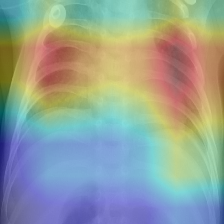

In [ ]:
from IPython.display import Image
Image('/content/drive/MyDrive/pneumonia_runs/resnet18/gradcam_pneumonia_1.png')

### Vizualize pneumonia_2 with Grad-CAM Virus

In [ ]:
pneumonia_2 = "/content/drive/MyDrive/Colab Notebooks/pneumonia-analysis/dataset/chest_xray/test/PNEUMONIA/person15_virus_46.jpeg"
!python -m src.gradcam --checkpoint "/content/drive/MyDrive/pneumonia_runs/resnet18/best_resnet18.pt" --image_path "$pneumonia_2" --out_path "/content/drive/MyDrive/pneumonia_runs/resnet18/gradcam_pneumonia_2.png" --arch "resnet18"

Saved Grad-CAM to /content/drive/MyDrive/pneumonia_runs/resnet18/gradcam_pneumonia_2.png. Pred class id: 1


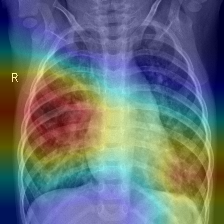

In [ ]:
Image('/content/drive/MyDrive/pneumonia_runs/resnet18/gradcam_pneumonia_2.png')

### Vizualize Noraml with Grad-CAM

In [ ]:
noraml_1 = "/content/drive/MyDrive/Colab Notebooks/pneumonia-analysis/dataset/chest_xray/test/NORMAL/IM-0433-0001.jpeg"
!python -m src.gradcam --checkpoint "/content/drive/MyDrive/pneumonia_runs/resnet18/best_resnet18.pt" --image_path "$noraml_1" --out_path "/content/drive/MyDrive/pneumonia_runs/resnet18/gradcam_noraml_1.png" --arch "resnet18"

Saved Grad-CAM to /content/drive/MyDrive/pneumonia_runs/resnet18/gradcam_noraml_1.png. Pred class id: 0


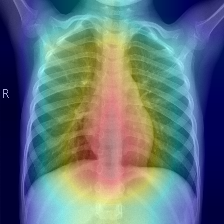

In [ ]:
Image("/content/drive/MyDrive/pneumonia_runs/resnet18/gradcam_noraml_1.png")

### Trainable parameter size

In [ ]:
from src.model import create_model
from src.utils import IMAGENET_MEAN, IMAGENET_STD, load_checkpoint

ckpt = load_checkpoint("/content/drive/MyDrive/pneumonia_runs/resnet18/best_resnet18.pt")
model = create_model(num_classes=len(ckpt.get("class_to_idx", {0:'Normal',1:'Pneumonia'})), arch="resnet18", pretrained=False)
total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Total trainable parameters: {total_params:,}")

Total trainable parameters: 11,506,114
